In [38]:
function energy(M)
    J = -1.0
    N = size(M)[1]

    E = 0

    for i=2:N-1
        for j=2:N-1
            s = M[i,j]
            E += -M[i,j]*(M[i+1,j] + M[i,j+1] + M[i-1,j] + M[i,j-1]) #neighbour(M,(i,j))
        end
    end

    return -J*(E)/2
end


energy (generic function with 1 method)

In [2]:
function neighbour(M,(a,b))
    return M[a+1,b] + M[a,b+1] + M[a-1,b] + M[a,b-1]
end

neighbour (generic function with 1 method)

In [3]:
#print(size( rand((-1,1),(100,100))))

In [49]:
function magnetization(M)
    m = 0
    len_lat = size(M)[1]
    for i=2:len_lat-1
        for j=2:len_lat-1
            m+=M[i,j]
        end
    end
    return abs(m)
end


magnetization (generic function with 1 method)

In [5]:
lat_1 = rand((-1,1),(10,10))
print(lat_1)
print(magnetization(lat_1))

[1 1 -1 1 1 1 1 1 1 -1; 1 -1 1 1 1 -1 1 1 -1 1; 1 -1 1 -1 1 -1 -1 -1 -1 1; 1 -1 1 1 1 1 1 -1 1 -1; 1 1 1 -1 -1 -1 -1 -1 1 1; -1 1 1 1 1 1 1 1 1 -1; -1 1 1 -1 1 1 -1 1 1 1; 1 -1 1 1 1 -1 -1 1 1 1; -1 1 1 1 1 1 -1 1 1 1; 1 -1 1 -1 -1 -1 -1 1 -1 1]20.0

In [56]:
function minimum_ele(M)
    if M[1] > M[2]
        return M[2]
    else
        return M[1]
    end        
end

function monte(M, Temperature)
    N = size(M)[1]
    
    time_steps = 10^4
    
    for i = 1:time_steps
            a = rand((2:N-1)) #random number
            b = rand((2:N-1)) #random number
            
            spin = M[a,b]
            
            dE = 2*spin*neighbour(M,(a,b))
            
            tent = minimum_ele([1.0, exp(-dE/Temperature)])
            prob = rand() # rand no between 0 1 uniformly distributed
            
            if tent > prob
                spin = -1*spin
            else
                spin = spin
            #M[a] = spin
            end
            M[a,b] = spin
            #println(M)
    end
    return M
end


monte (generic function with 1 method)

In [73]:
function main(temp_array)
    Pts = 35 #no. of points on Energy-Temp graph

    Erg_array = zeros(Pts,1) #LinRange(0.001,5,Pts)
    Mag_array = zeros(Pts,1) #LinRange(0.001,5,Pts)

    for i=1:Pts
        print(i, " ")
        N = 9 #??
        Lat = rand((-1,1),(100,100))
        magn_cal = 0
        erg_cal = 0
        leng_lat = 2:size(Lat,1)-1
        fc = 2^N
        for j=1:2^N
            Lat = monte(Lat,temp_array[i])
            magn_cal+=magnetization(Lat[leng_lat,leng_lat])/fc
            erg_cal+=energy(Lat[leng_lat,leng_lat])/fc
        end
        Mag_array[i] = magn_cal/(100^2)
        Erg_array[i] = erg_cal/(100^2)
    end
    return Mag_array, Erg_array
end

main (generic function with 2 methods)

In [89]:
using PyPlot
#Ts = range(0.1, 1.5, length=100)
#exact_C(T) = 1/(T * cosh(1/T))^2
exact_C(T) = -2tanh(2/T)


exact_C (generic function with 1 method)

In [67]:
Pts = 35 #no. of points on Energy-Temp graph

temp_array = LinRange(0.001,3.5,Pts)


35-element LinRange{Float64}:
 0.001,0.103912,0.206824,0.309735,…,3.08835,3.19126,3.29418,3.39709,3.5

In [75]:
tent_arra = main(temp_array)
M_arra, E_arra = tent_arra[1], tent_arra[2]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 

([0.36305859375; 0.44938515625; … ; 0.02164765625; 0.01882890625], [-1.76142734375; -1.7684791015625; … ; -0.6323818359375; -0.6061435546875])

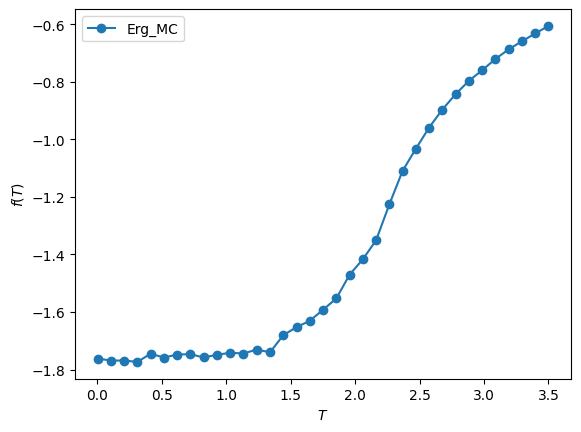

PyObject <matplotlib.legend.Legend object at 0x7fda54bac130>

In [91]:
Ts = temp_array
#plt.plot(Ts, exact_C.(Ts), label="Exact")
plt.plot(temp_array, E_arra, label="Erg_MC", marker="o")
#plt.plot(temp_array, M_arra, label="Mag_MC", marker="v")

plt.xlabel(raw"$T$")
plt.ylabel(raw"$f(T)$")
#plt.xlim([0, nothing])
#plt.ylim([0, nothing])
plt.legend()
